In [80]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [81]:
#11.3N 4S 1.5E -3.5W

In [82]:
for file in ['HEAT_STRESS_DATA.nc']:
    var_name = 't'
    csv_file_out = file[:-3]  + '.csv'
    ds = xr.open_dataset(file)
    ds['time'] = ds.time.dt.year
    a=ds.sel(latitude=7.9465,longitude=1.0232, method="nearest" )
    
    b=a[['time', 't', 'r','v','u','latitude','longitude']]
    
    df = b.to_dataframe()
    if var_name:
        df[var_name] = df[var_name].apply(lambda x: x - 273.15)
        df.to_csv(csv_file_out)
        print (csv_file_out + ' has been successfully processed - OK')




HEAT_STRESS_DATA.csv has been successfully processed - OK


In [83]:
df2=pd.read_csv(r'HEAT_STRESS_DATA.csv',usecols=['time','t','r','v','u'],parse_dates=['time'])
df2 = df2.set_index('time')
df2= df2[['t','r','v','u']].resample('1Y').mean()
df2 = pd.DataFrame(df2)
df2.dropna(0, inplace=True)
df2.to_csv('HEAT_STRESS_DATA.csv')


C:\Users\Annorion\AppData\Local\Temp/ipykernel_6216/725376801.py:5: FutureWarning:

In a future version of pandas all arguments of DataFrame.dropna will be keyword-only



In [84]:
df = pd.read_csv(r'HEAT_STRESS_DATA.csv', usecols=['time','t','r','v'])

T = df.loc[:,'t']

R = df.loc[:,'r']

V = df.loc[:,'v']

In [85]:
#!/usr/bin/python
# Heat-Index calculator with celsius-grade
#
# Simple Python scratch meant to test the different available
# heat-index formulas with temperatures lower than 25*C/77 Fahrenheit.
# 
# Formulas are at https://en.wikipedia.org/wiki/Heat_index#Formula
#
# GregNau	2015

#print("\nHeat-Index calculator v0.1\n")

# Ask for the current temperature in celsius-grade...
#temp = float(input('Temperature(*C): '))
temp = T
# ...then wait for the relative humidity in % value
hum = R
# Convert celius to fahrenheit (heat-index is only fahrenheit compatible)
fahrenheit = ((temp * 9/5) + 32)

# Creating multiples of 'fahrenheit' & 'hum' values for the coefficients
T2 = pow(fahrenheit, 2)
T3 = pow(fahrenheit, 3)
H2 = pow(hum, 2)
H3 = pow(hum, 3)

# Coefficients for the calculations
C1 = [ -42.379, 2.04901523, 10.14333127, -0.22475541, -6.83783e-03, -5.481717e-02, 1.22874e-03, 8.5282e-04, -1.99e-06]
C2 = [ 0.363445176, 0.988622465, 4.777114035, -0.114037667, -0.000850208, -0.020716198, 0.000687678, 0.000274954, 0]
C3 = [ 16.923, 0.185212, 5.37941, -0.100254, 0.00941695, 0.00728898, 0.000345372, -0.000814971, 0.0000102102, -0.000038646, 0.0000291583, 0.00000142721, 0.000000197483, -0.0000000218429, 0.000000000843296, -0.0000000000481975]

# Calculating heat-indexes with 3 different formula
HI = C1[0] + (C1[1] * fahrenheit) + (C1[2] * hum) + (C1[3] * fahrenheit * hum) + (C1[4] * T2) + (C1[5] * H2) + (C1[6] * T2 * hum) + (C1[7] * fahrenheit * H2) + (C1[8] * T2 * H2)
#heatindex2 = C2[0] + (C2[1] * fahrenheit) + (C2[2] * hum) + (C2[3] * fahrenheit * hum) + (C2[4] * T2) + (C2[5] * H2) + (C2[6] * T2 * hum) + (C2[7] * fahrenheit * H2) + (C2[8] * T2 * H2)
#heatindex3 = C3[0] + (C3[1] * fahrenheit) + (C3[2] * hum) + (C3[3] * fahrenheit * hum) + (C3[4] * T2) + (C3[5] * H2) + (C3[6] * T2 * hum) + (C3[7] * fahrenheit * H2) + (C3[8] * T2 * H2) + (C3[9] * T3) + (C3[10] * H3) + (C3[11] * T3 * hum) + (C3[12] * fahrenheit * H3) + (C3[13] * T3 * H2) + (C3[14] * T2 * H3) + (C3[15] * T3 * H3)
HI = ((HI - 32) * 5/9)
#print("\nThe Heat index or the feels-like temperature is:")
#print("Heatindex 1:"),
#print(round(((heatindex1 - 32) * 5/9), 0)),
#print("*C")
# print("Heatindex 2:"),
# print(round(((heatindex2 - 32) * 5/9), 0)),
# print("*C")
# print("Heatindex 3:"),
# print(round(((heatindex3 - 32) * 5/9), 0)),
# print("*C")

In [86]:
Tw = 13.12 + 0.6215*T - 11.37*V**0.16 + 0.3965*T*V**0.16

In [87]:
DI = T- 0.55 * (1 - 0.01*R) * (T - 14.5)

In [88]:
df=pd.concat([pd.read_csv('HEAT_STRESS_DATA.csv'), HI,Tw,DI], axis=1) \
  .to_csv('HEAT_STRESS_DATA.csv', header=True, index=False)


In [89]:
df = pd.read_csv(r'HEAT_STRESS_DATA.csv')
mapping = {df.columns[5]: 'HI', df.columns[6]: 'Tw', df.columns[7]: 'DI'}
df.rename(columns=mapping, inplace=True)
df.set_index('time')
df.to_csv('HEAT_STRESS_DATA.csv')

In [90]:
df = pd.read_csv(r'HEAT_STRESS_DATA.csv')
df['year'] = pd.DatetimeIndex(df['time']).year
year = df['year']
df.set_index('year')
a=df[['year','t','r','v','HI','Tw','DI']]
b = pd.DataFrame(a, columns = ['year','t','r','v','HI','Tw','DI'])
b.set_index("year", inplace = True)
b.to_csv('HEAT_STRESS_DATA.csv')
print ('HEAT_STRESS_DATA.csv' + ' has been successfully processed - OK')
b

HEAT_STRESS_DATA.csv has been successfully processed - OK


t          r         v         HI         Tw         DI
year                                                                 
1970  27.597144  72.817850  0.583195  30.229650  29.879249  25.639097
1976  27.018686  73.925005  0.523107  29.224843  29.319734  25.223350
1980  27.480994  74.452509  0.591094  30.184858  29.763879  25.657019
1981  27.645120  72.496521  0.548328  30.286615  29.930196  25.656669
1982  27.431970  72.698487  0.454114  29.893257  29.734269  25.490127
1983  28.018991  67.285944  0.524735  30.349131  30.298868  25.586555
1984  27.837325  70.988645  0.496934  30.478582  30.123594  25.709189
1985  27.669776  71.715343  0.485514  30.242004  29.961386  25.621012
1986  27.675668  72.163012  0.524219  30.306967  29.962767  25.658428
1987  28.463571  71.311413  0.588130  31.798326  30.732771  26.260298
1988  27.971676  72.444258  0.558278  30.938318  30.250031  25.929955
1989  27.763445  69.250124  0.503073  30.125726  30.050848  25.520274
1990  28.100351  71.413391  0.538060  31.058751  30.377702  25.962017
1991  27.741780  74.397811  0.530332  30.718049  30.026874  25.877178
1992  27.825723  69.465155  0.478448  30.267054  30.114093  25.587779
1993  27.832206  71.281629  0.510298  30.505589  30.117324  25.726370
1994  27.787052  71.276424  0.504489  30.416716  30.073765  25.687968
1995  28.134556  70.187980  0.465242  30.955439  30.415713  25.898951
1996  28.025802  72.272965  0.613483  31.026225  30.299650  25.963135
1997  27.950705  70.494582  0.501380  30.635854  30.233890  25.767928
1998  28.682965  68.322013  0.462093  31.768595  30.948933  26.211882
1999  27.825245  72.412701  0.531920  30.635844  30.108503  25.803404
2000  28.051220  68.230996  0.428629  30.530419  30.337540  25.683422
2001  28.041477  67.968904  0.580231  30.478137  30.317206  25.655861
2002  27.980630  69.986124  0.502160  30.627178  30.263051  25.755298
2003  28.295562  70.408768  0.536578  31.310138  30.569180  26.050310
2004  28.084202  71.630859  0.521400  31.056415  30.362933  25.964655
2005  28.268991  70.723232  0.542519  31.302718  30.542872  26.051878
2006  28.375080  69.154679  0.524946  31.282628  30.647518  26.021183
2007  28.117588  69.433376  0.495160  30.817697  30.397252  25.828248
2008  28.153772  67.302661  0.432545  30.596875  30.436520  25.698341
2009  28.235737  71.096935  0.495849  31.289853  30.512510  26.052210
2010  28.447003  70.994734  0.544530  31.712938  30.717460  26.222052
2011  28.120404  69.732894  0.534487  30.864394  30.397577  25.853027
2012  27.953994  70.348976  0.488253  30.623189  30.238186  25.759908
2013  28.291533  69.124892  0.522432  31.113269  30.565819  25.949550
2014  28.186581  71.334666  0.527262  31.223725  30.462825  26.028764
2015  28.324859  67.572614  0.435126  30.953513  30.602057  25.859186
2016  28.563824  69.313017  0.426975  31.687095  30.833631  26.190154
2017  28.774838  67.685776  0.499302  31.848625  31.038660  26.237796
2018  28.401481  69.857903  0.476212  31.442046  30.674887  26.096872
2019  28.676719  70.778817  0.501353  32.165352  30.942866  26.398286
2020  28.803298  66.455934  0.486665  31.701789  31.066260  26.164449
2021  29.021870  66.149997  0.546475  32.080652  31.281622  26.318261

In [91]:
df = pd.read_csv(r'HEAT_STRESS_DATA.csv')
x=0 # could change x and y to a start and end date
y=1

df.loc[x:y].index

df.drop(df.loc[x:y].index, inplace=True)
df.set_index('year', inplace=True)
df = pd.DataFrame(df)
df.to_csv('HEAT_STRESS_DATA.csv')


In [92]:
df = pd.read_csv(r'HEAT_STRESS_DATA.csv')
year = df.loc[:,'year']
HI = df.loc[:,'HI']
Tw = df.loc[:,'Tw']
DI = df.loc[:,'DI']

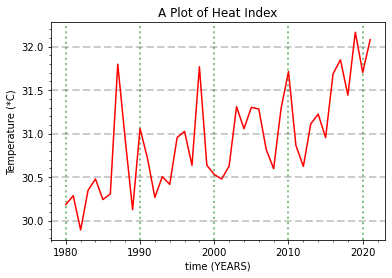

In [122]:


from matplotlib.ticker import AutoMinorLocator, FormatStrFormatter
# Data for plotting


fig, ax = plt.subplots()
ax.plot(year, HI, color='red')

ax.set(xlabel='time (YEARS)', ylabel='Temperature (*C)',
       title='A Plot of Heat Index')
#ax.grid()
ax.grid(axis="x", color="green", alpha=.5, linewidth=2, linestyle=":")
ax.grid(axis="y", color="black", alpha=.2, linewidth=2, linestyle="--")
ax.yaxis.set_minor_locator(AutoMinorLocator())

minor_locator = AutoMinorLocator(5)
ax.xaxis.set_minor_locator(minor_locator)
plt.minorticks_on()
fig.savefig("Heat-Index.png")
plt.show()

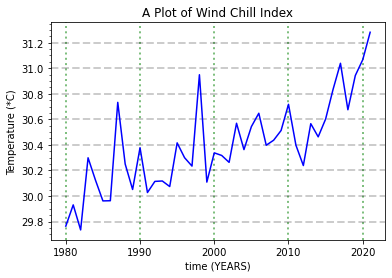

In [126]:
# Data for plotting


fig, ax = plt.subplots()
ax.plot(year, Tw, color='blue')

ax.set(xlabel='time (YEARS)', ylabel='Temperature (*C)',
       title='A Plot of Wind Chill Index')
ax.grid(axis="x", color="green", alpha=.5, linewidth=2, linestyle=":")
ax.grid(axis="y", color="black", alpha=.2, linewidth=2, linestyle="--")
ax.yaxis.set_minor_locator(AutoMinorLocator())

fig.savefig("Wind-Chill-Index.png")
plt.show()

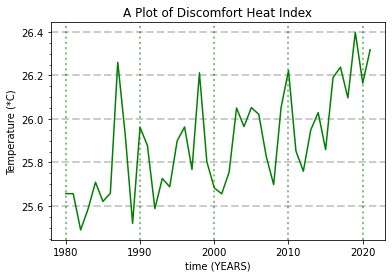

In [127]:
# Data for plotting


fig, ax = plt.subplots()
ax.plot(year, DI, color='green')

ax.set(xlabel='time (YEARS)', ylabel='Temperature (*C)',
       title='A Plot of Discomfort Heat Index')
ax.grid(axis="x", color="green", alpha=.5, linewidth=2, linestyle=":")
ax.grid(axis="y", color="black", alpha=.2, linewidth=2, linestyle="--")
ax.yaxis.set_minor_locator(AutoMinorLocator())

fig.savefig("Discomfort-Heat-Index.png")
plt.show()

In [30]:

# import plotly.graph_objects as go

# # Create random data with numpy
# import numpy as np
# #np.random.seed(1)


# df = pd.read_csv(r'HEAT_STRESS_DATA.csv')
# year = df.loc[:,'year']
# HI = df.loc[:,'HI']
# Tw = df.loc[:,'Tw']
# DI = df.loc[:,'DI']

# # Create traces
# fig = go.Figure()
# fig.add_trace(go.Scatter(x=year, y=HI,
#                     mode='lines+markers',
#                     name='Heat Index'))
# fig.add_trace(go.Scatter(x=year, y=Tw,
#                     mode='lines+markers',
#                     name='Wind Chill Index'))
# fig.add_trace(go.Scatter(x=year, y=DI,
#                     mode='lines+markers', name='Discomfort Heat Index'))

# fig.update_layout(
#     #title="",
#     xaxis_title="Time in Years",
#     yaxis_title="Temperature(*C)",
#     legend_title="Temperature Indices",
#     title={
#         'text': "TEMPERATURE INDICES FROM 1970 - 2021",
#         'y':0.9,
#         'x':0.5,
#         'xanchor': 'center',
#         'yanchor': 'top'}
    
    
# )

# fig.show()

# WIND CHILL INDEX

# DISCOMFORT HEAT INDEX